In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from collections import defaultdict, Counter
import seaborn as sns
from sklearn.manifold import TSNE#, SpectralEmbedding
from sklearn.datasets import fetch_mldata
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn import cluster, manifold, metrics
from sklearn import preprocessing
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from wordcloud import WordCloud
%matplotlib inline

In [2]:
df = pd.read_csv("movie_metadata.csv")

In [3]:
print(df.head(5))
print(df.tail(5))

   color      director_name  num_critic_for_reviews  duration  \
0  Color      James Cameron                   723.0     178.0   
1  Color     Gore Verbinski                   302.0     169.0   
2  Color         Sam Mendes                   602.0     148.0   
3  Color  Christopher Nolan                   813.0     164.0   
4    NaN        Doug Walker                     NaN       NaN   

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                      0.0                   855.0  Joel David Moore   
1                    563.0                  1000.0     Orlando Bloom   
2                      0.0                   161.0      Rory Kinnear   
3                  22000.0                 23000.0    Christian Bale   
4                    131.0                     NaN        Rob Walker   

   actor_1_facebook_likes        gross                           genres  \
0                  1000.0  760505847.0  Action|Adventure|Fantasy|Sci-Fi   
1                 40000.0 

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

In [5]:
print(df.isnull().sum().sum())
print(5043*28)

2698
141204


In [6]:
print(df.describe())

       num_critic_for_reviews     duration  director_facebook_likes  \
count             4993.000000  5028.000000              4939.000000   
mean               140.194272   107.201074               686.509212   
std                121.601675    25.197441              2813.328607   
min                  1.000000     7.000000                 0.000000   
25%                 50.000000    93.000000                 7.000000   
50%                110.000000   103.000000                49.000000   
75%                195.000000   118.000000               194.500000   
max                813.000000   511.000000             23000.000000   

       actor_3_facebook_likes  actor_1_facebook_likes         gross  \
count             5020.000000             5036.000000  4.159000e+03   
mean               645.009761             6560.047061  4.846841e+07   
std               1665.041728            15020.759120  6.845299e+07   
min                  0.000000                0.000000  1.620000e+02   
25%  

# Exploration

### Color

In [7]:
print(df["color"].value_counts())
print(df["color"].isnull().sum())

Color               4815
 Black and White     209
Name: color, dtype: int64
19


In [8]:
print(df.groupby("title_year")["color"].value_counts())

title_year  color           
1916.0       Black and White      1
1920.0       Black and White      1
1925.0       Black and White      1
1927.0       Black and White      1
1929.0       Black and White      2
1930.0       Black and White      1
1932.0       Black and White      1
1933.0       Black and White      2
1934.0       Black and White      1
1935.0       Black and White      1
1936.0       Black and White      2
1937.0       Black and White      1
            Color                 1
1938.0       Black and White      2
1939.0       Black and White      2
            Color                 1
1940.0       Black and White      3
            Color                 2
1941.0       Black and White      1
1942.0      Color                 2
1943.0       Black and White      1
1944.0      Color                 1
1945.0       Black and White      2
            Color                 2
1946.0      Color                 2
             Black and White      1
1947.0       Black and White      2

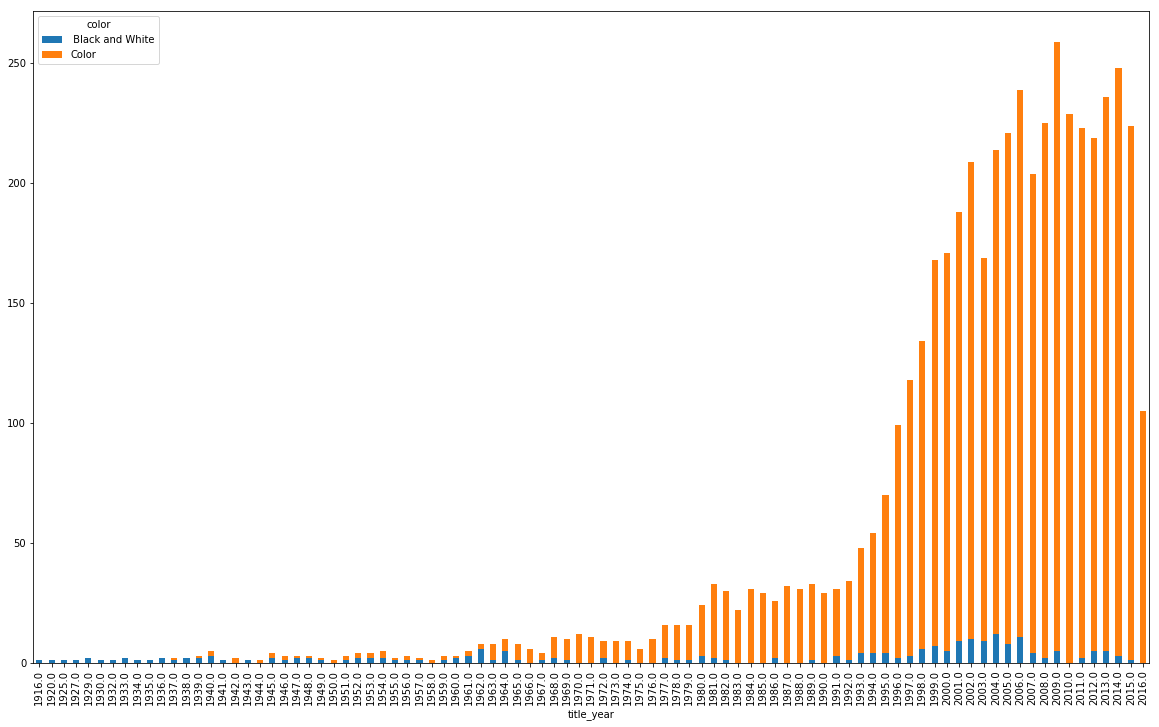

In [9]:
a = df.groupby("title_year")["color"].value_counts().unstack().fillna(0)

a.plot.bar(stacked=True, figsize=(20,12))
plt.savefig("img/color.png")
plt.show()

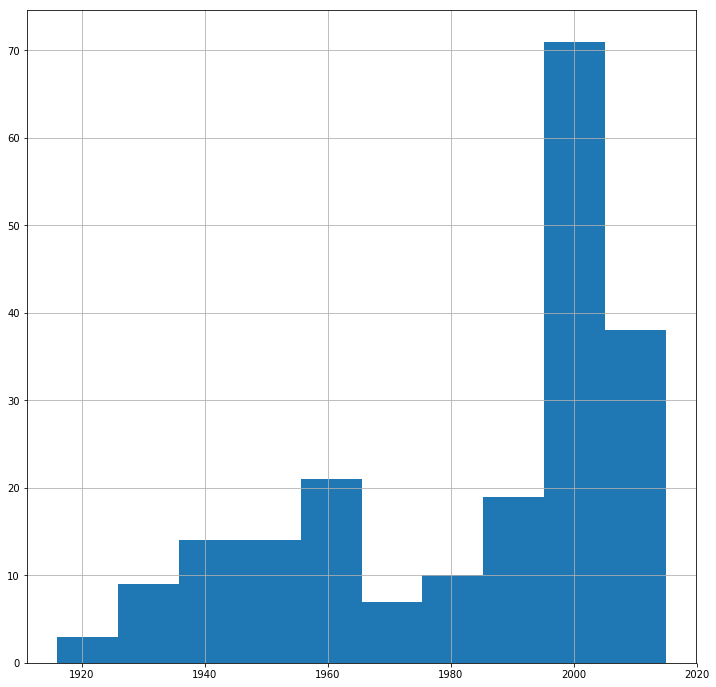

In [10]:
df[df["color"] == " Black and White"]["title_year"].hist(figsize=(12,12))

In [11]:
df[df["color"].isnull()][["title_year", "movie_title"]]
#df[df["color"].isnull()]

,title_year,movie_title
4,NaN,Star Wars: Episode VII - The Force Awakens ...
279,NaN,"10,000 B.C."
459,NaN,Daredevil
1948,2010.0,Dear John
2015,2014.0,Red Sky
2459,NaN,Unforgettable
2753,2009.0,Shinjuku Incident
3272,2015.0,Into the Grizzly Maze
3539,2014.0,Alpha and Omega 4: The Legend of the Saw Tooth...
3638,2011.0,Snow Flower and the Secret Fan


In [12]:
df["color"] = df["color"].fillna("Color")

### director_name

In [13]:
print(df["director_name"].value_counts())
print(df["director_name"].isnull().sum())

Steven Spielberg         26
Woody Allen              22
Martin Scorsese          20
Clint Eastwood           20
Ridley Scott             17
Spike Lee                16
Tim Burton               16
Steven Soderbergh        16
Renny Harlin             15
Oliver Stone             14
Joel Schumacher          13
Sam Raimi                13
Barry Levinson           13
John Carpenter           13
Ron Howard               13
Michael Bay              13
Robert Rodriguez         13
Robert Zemeckis          13
Wes Craven               12
Tony Scott               12
Shawn Levy               12
Richard Donner           12
Brian De Palma           12
Peter Jackson            12
Kevin Smith              12
Stephen Frears           11
Rob Reiner               11
Rob Cohen                11
Chris Columbus           11
Richard Linklater        11
                         ..
John Maybury              1
Robert D. Webb            1
Mike Disa                 1
Maryam Keshavarz          1
David Anspaugh      

### num_critic_for_reviews

In [14]:
print(df["num_critic_for_reviews"].value_counts())
print(df["num_critic_for_reviews"].isnull().sum())

1.0      43
9.0      37
5.0      36
10.0     35
8.0      35
12.0     34
16.0     33
81.0     33
43.0     31
29.0     30
63.0     29
46.0     29
25.0     29
4.0      29
50.0     28
112.0    28
15.0     28
6.0      28
21.0     28
97.0     28
64.0     28
14.0     27
56.0     27
66.0     27
78.0     26
23.0     26
39.0     26
44.0     26
98.0     26
18.0     26
         ..
481.0     1
518.0     1
588.0     1
307.0     1
385.0     1
493.0     1
606.0     1
733.0     1
522.0     1
311.0     1
367.0     1
813.0     1
634.0     1
495.0     1
427.0     1
549.0     1
346.0     1
534.0     1
338.0     1
423.0     1
437.0     1
509.0     1
596.0     1
356.0     1
340.0     1
460.0     1
410.0     1
765.0     1
502.0     1
775.0     1
Name: num_critic_for_reviews, Length: 528, dtype: int64
50


In [15]:
df["num_critic_for_reviews"] = df["num_critic_for_reviews"].fillna(0)

### duration

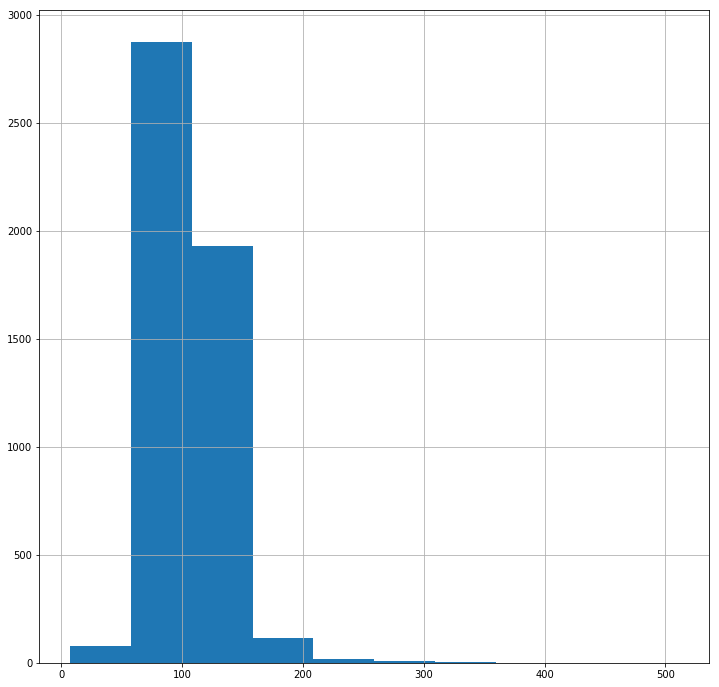

In [16]:
df["duration"].hist(figsize=(12,12))
plt.show()

In [17]:
df["duration"] = df["duration"].fillna(df["duration"].mean())

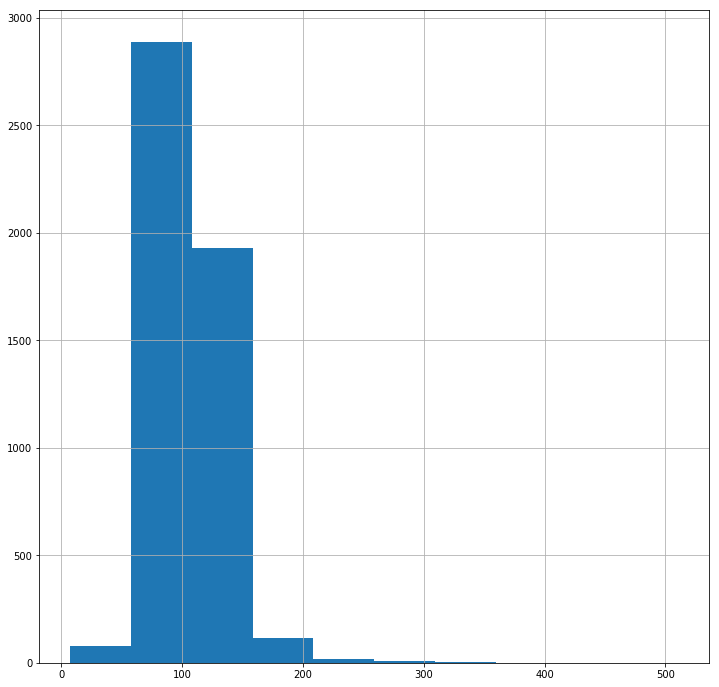

In [18]:
df["duration"].hist(figsize=(12,12))
plt.show()

### gross

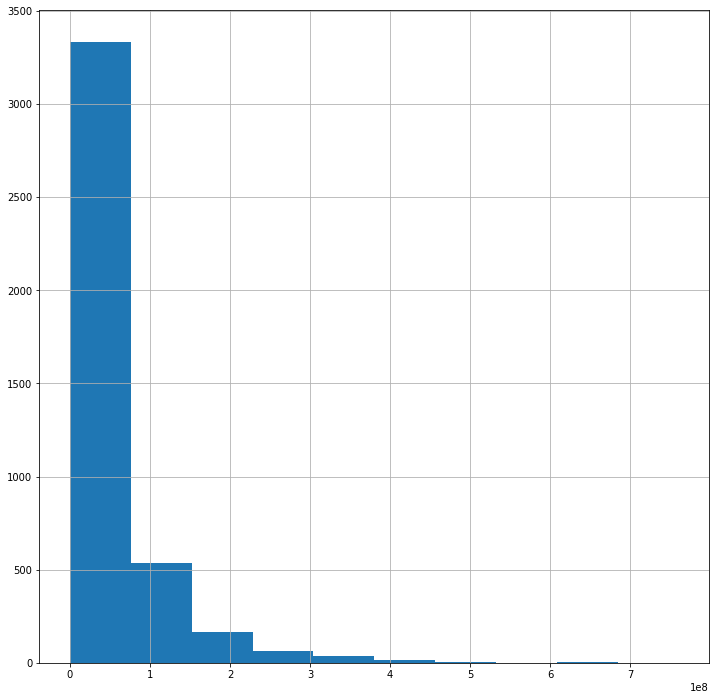

In [19]:
df["gross"].hist(figsize=(12,12))
plt.show()

In [20]:
print(df["gross"].value_counts())

218051260.0    3
3000000.0      3
34964818.0     3
5773519.0      3
47000000.0     3
8000000.0      3
144512310.0    3
177343675.0    3
30093107.0     2
124051759.0    2
27900000.0     2
34700000.0     2
13998282.0     2
72660029.0     2
47811275.0     2
292298923.0    2
5000000.0      2
16017403.0     2
37188667.0     2
76600000.0     2
144812796.0    2
15785632.0     2
623279547.0    2
61094903.0     2
54557348.0     2
79363785.0     2
36200000.0     2
58607007.0     2
26400000.0     2
2000000.0      2
              ..
466702.0       1
10965209.0     1
11883495.0     1
14373825.0     1
127144.0       1
29077547.0     1
53300852.0     1
261437578.0    1
25863915.0     1
92969824.0     1
6531491.0      1
12570442.0     1
11227940.0     1
700000.0       1
380262555.0    1
22717758.0     1
25339117.0     1
39143839.0     1
4903000.0      1
841206.0       1
223878.0       1
7186670.0      1
75573300.0     1
760505847.0    1
43337279.0     1
2268296.0      1
217387997.0    1
17474107.0    

In [21]:
df["gross"] = df["gross"].fillna(df["gross"].mean())

### genres

In [22]:
print(df["genres"].value_counts())

Drama                                                     236
Comedy                                                    209
Comedy|Drama                                              191
Comedy|Drama|Romance                                      187
Comedy|Romance                                            158
Drama|Romance                                             152
Crime|Drama|Thriller                                      101
Horror                                                     71
Action|Crime|Drama|Thriller                                68
Action|Crime|Thriller                                      65
Drama|Thriller                                             64
Crime|Drama                                                63
Horror|Thriller                                            56
Crime|Drama|Mystery|Thriller                               55
Documentary                                                51
Comedy|Crime                                               51
Action|A

In [23]:
cnt = Counter()
liste = df["genres"].tolist()
for keywords in liste:
    if not pd.isnull(keywords):
        for word in keywords.split("|"):
            cnt[word] += 1
print(cnt)
print(len(cnt))

Counter({'Drama': 2594, 'Comedy': 1872, 'Thriller': 1411, 'Action': 1153, 'Romance': 1107, 'Adventure': 923, 'Crime': 889, 'Sci-Fi': 616, 'Fantasy': 610, 'Horror': 565, 'Family': 546, 'Mystery': 500, 'Biography': 293, 'Animation': 242, 'Music': 214, 'War': 213, 'History': 207, 'Sport': 182, 'Musical': 132, 'Documentary': 121, 'Western': 97, 'Film-Noir': 6, 'Short': 5, 'News': 3, 'Reality-TV': 2, 'Game-Show': 1})
26


In [24]:
most_common = [word for word, word_count in cnt.most_common(21)]  # the last 5 don't have a lot of movies
print(most_common)

['Drama', 'Comedy', 'Thriller', 'Action', 'Romance', 'Adventure', 'Crime', 'Sci-Fi', 'Fantasy', 'Horror', 'Family', 'Mystery', 'Biography', 'Animation', 'Music', 'War', 'History', 'Sport', 'Musical', 'Documentary', 'Western']


In [25]:
for word in most_common:
    key_word = "type_{}".format(word)
    df[key_word] = 0
    
for word in most_common:
    key_word = "type_{}".format(word)
    df[key_word] = df["genres"].str.contains(word)
    df[key_word] = df[key_word].fillna(False)
    df[key_word] = df[key_word].astype(int)

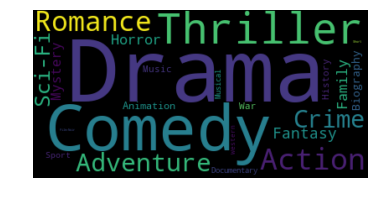

In [26]:
wordcloud = WordCloud()
wordcloud.generate_from_frequencies(frequencies=cnt)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig("img/genres_cloud.png")
plt.show()

### facenumber_in_poster

In [27]:
print(df["facenumber_in_poster"].value_counts())

0.0     2152
1.0     1251
2.0      716
3.0      380
4.0      207
5.0      114
6.0       76
7.0       48
8.0       37
9.0       18
10.0      10
15.0       6
11.0       5
12.0       4
13.0       2
19.0       1
14.0       1
31.0       1
43.0       1
Name: facenumber_in_poster, dtype: int64


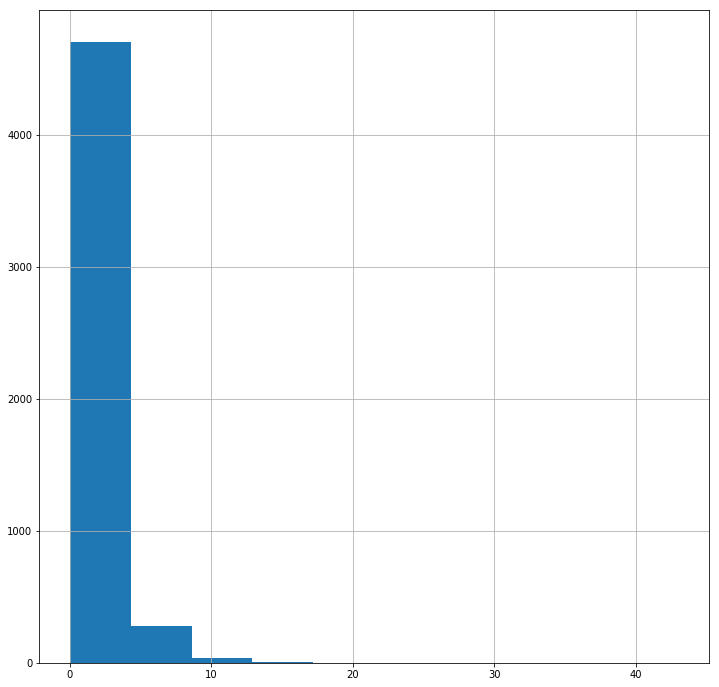

In [28]:
df["facenumber_in_poster"].hist(figsize=(12,12))
plt.show()

In [29]:
df["facenumber_in_poster"] = df["facenumber_in_poster"].fillna(0)

### Keywords

In [30]:
print(df["plot_keywords"].value_counts())

based on novel                                                                                                  4
eighteen wheeler|illegal street racing|truck|trucker|undercover cop                                             3
assistant|experiment|frankenstein|medical student|scientist                                                     3
one word title                                                                                                  3
animal name in title|ape abducts a woman|gorilla|island|king kong                                               3
1940s|child hero|fantasy world|orphan|reference to peter pan                                                    3
alien friendship|alien invasion|australia|flying car|mother daughter relationship                               3
halloween|masked killer|michael myers|slasher|trick or treat                                                    3
egypt|exodus|moses|pharaoh|plague                                                       

In [31]:
cnt = Counter()
liste = df["plot_keywords"].tolist()
for keywords in liste:
    if not pd.isnull(keywords):
        for word in keywords.split("|"):
            cnt[word] += 1

In [32]:
print(cnt.most_common(100))
most_common = [word for word, word_count in cnt.most_common(100)]

[('love', 198), ('friend', 166), ('murder', 161), ('death', 132), ('police', 126), ('new york city', 91), ('high school', 89), ('alien', 82), ('school', 73), ('boy', 72), ('fbi', 71), ('revenge', 70), ('friendship', 68), ('drugs', 66), ('prison', 62), ('money', 61), ('marriage', 60), ('island', 57), ('dog', 57), ('female protagonist', 57), ('escape', 56), ('party', 56), ('wedding', 52), ('sex', 52), ('detective', 51), ('serial killer', 51), ('box office flop', 49), ('battle', 48), ('teenager', 48), ('rescue', 48), ('female nudity', 48), ('hospital', 47), ('secret', 47), ('vomiting', 47), ('lawyer', 47), ('scientist', 46), ('best friend', 46), ('christmas', 46), ('train', 45), ('cia', 45), ('singer', 45), ('college', 44), ('hotel', 44), ('fight', 43), ('future', 42), ('texas', 42), ('king', 42), ('writer', 42), ('vampire', 42), ('small town', 42), ('terrorist', 41), ('teacher', 41), ('male nudity', 41), ('girl', 40), ('cult film', 40), ('student', 40), ('spy', 38), ('president', 38), ('

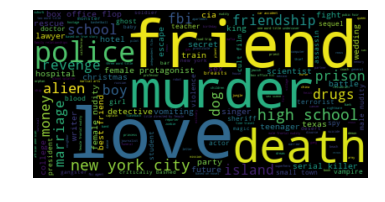

In [33]:
wordcloud = WordCloud()
wordcloud.generate_from_frequencies(frequencies=cnt)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig("img/keywork_cloud.png")
plt.show()

In [34]:
# for word in most_common:
#     key_word = "key_{}".format(word)
#     df[key_word] = 0

In [35]:
# print(df.info())

In [36]:
#print(df["plot_keywords"].str.contains("love"))

In [37]:
# for word in most_common:
#     key_word = "key_{}".format(word)
#     df[key_word] = df["plot_keywords"].str.contains(word)
#     df[key_word] = df[key_word].fillna(False)
#     df[key_word] = df[key_word].astype(int)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 49 columns):
color                        5043 non-null object
director_name                4939 non-null object
num_critic_for_reviews       5043 non-null float64
duration                     5043 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        5043 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5043 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

### Num users for review

In [39]:
print(df["num_user_for_reviews"].value_counts())

1.0       51
3.0       33
2.0       32
26.0      32
10.0      29
6.0       28
50.0      26
8.0       25
32.0      25
11.0      24
31.0      24
20.0      23
4.0       23
14.0      23
9.0       23
15.0      23
33.0      22
28.0      22
21.0      22
18.0      22
27.0      22
53.0      22
39.0      22
73.0      21
40.0      20
56.0      20
37.0      20
38.0      20
23.0      20
69.0      20
          ..
445.0      1
701.0      1
2814.0     1
2067.0     1
3646.0     1
1009.0     1
903.0      1
565.0      1
1110.0     1
2047.0     1
3054.0     1
1912.0     1
534.0      1
788.0      1
685.0      1
964.0      1
998.0      1
2153.0     1
5060.0     1
2277.0     1
1273.0     1
1123.0     1
2319.0     1
1588.0     1
1159.0     1
2968.0     1
722.0      1
381.0      1
1109.0     1
484.0      1
Name: num_user_for_reviews, Length: 954, dtype: int64


In [40]:
df["num_user_for_reviews"] = df["num_user_for_reviews"].fillna(0)

### Language

In [41]:
print(df["language"].value_counts())
print(df["language"].notnull().sum())

English       4704
French          73
Spanish         40
Hindi           28
Mandarin        26
German          19
Japanese        18
Cantonese       11
Russian         11
Italian         11
Portuguese       8
Korean           8
Danish           5
Swedish          5
Hebrew           5
Arabic           5
Polish           4
Dutch            4
Persian          4
Norwegian        4
Thai             3
Chinese          3
Romanian         2
Aboriginal       2
Icelandic        2
Indonesian       2
Dari             2
Zulu             2
None             2
Tamil            1
Bosnian          1
Maya             1
Mongolian        1
Panjabi          1
Urdu             1
Czech            1
Dzongkha         1
Swahili          1
Hungarian        1
Slovenian        1
Kazakh           1
Telugu           1
Greek            1
Vietnamese       1
Aramaic          1
Kannada          1
Filipino         1
Name: language, dtype: int64
5031


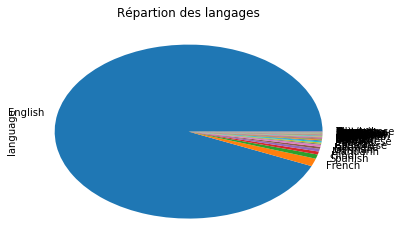

In [42]:
df["language"].value_counts().plot(kind='pie')
plt.title("Répartion des langages")
plt.savefig("img/language.png")

In [43]:
df["language"] = df["language"].fillna("English")

### Country

In [44]:
print(df["country"].value_counts())
print(df["country"].notnull().sum())

USA                     3807
UK                       448
France                   154
Canada                   126
Germany                   97
Australia                 55
India                     34
Spain                     33
China                     30
Japan                     23
Italy                     23
Hong Kong                 17
Mexico                    17
New Zealand               15
South Korea               14
Ireland                   12
Denmark                   11
Russia                    11
South Africa               8
Brazil                     8
Norway                     8
Sweden                     6
Thailand                   5
Poland                     5
Netherlands                5
Iran                       4
Belgium                    4
Argentina                  4
Romania                    4
Israel                     4
                        ... 
Taiwan                     2
Hungary                    2
Bulgaria                   1
Official site 

In [45]:
df[df["country"].isnull()][["language", "movie_title"]]

,language,movie_title
4,English,Star Wars: Episode VII - The Force Awakens ...
279,English,"10,000 B.C."
2370,English,"Gone, Baby, Gone"
3397,English,Preacher
4021,English,Dawn Patrol


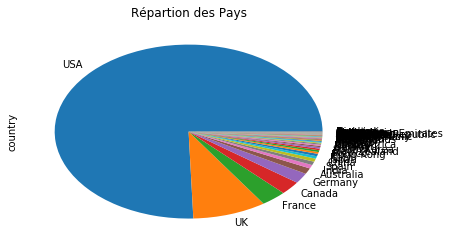

In [46]:
df["country"].value_counts().plot(kind='pie')
plt.title("Répartion des Pays")
plt.savefig("img/country.png")

In [47]:
df["country"] = df["country"].fillna("USA")

### Content Rating

https://en.wikipedia.org/wiki/Television_content_rating_system#United_States

https://en.wikipedia.org/wiki/Motion_Picture_Association_of_America_film_rating_system

In [48]:
print(df["content_rating"].value_counts())

R            2118
PG-13        1461
PG            701
Not Rated     116
G             112
Unrated        62
Approved       55
TV-14          30
TV-MA          20
X              13
TV-PG          13
TV-G           10
Passed          9
NC-17           7
GP              6
M               5
TV-Y7           1
TV-Y            1
Name: content_rating, dtype: int64


In [49]:
converter_rating_to_std = {
    "TV-Y":"G",
    "M":"PG",
    "GP":"PG",
    "X":"NC-17",
    "Not Rated": "Unrated",
    "TV-G":"G",
    "TV-PG": "PG",
    "TV-MA": "NC-17",
    "TV-14" : "PG-13",
    "Approved" : "G",
    "Passed": "Unrated"
}

In [50]:
def convert(rating):
    if converter_rating_to_std.get(rating, False):
        return converter_rating_to_std[rating]
    else: 
        return rating

df["content_rating"] = df["content_rating"].apply(convert)

In [51]:
df[df["content_rating"] =="Passed"]["movie_title"]

Series([], Name: movie_title, dtype: object)

In [52]:
df['All_age'] = 0
df['Min_7'] = 0
df['Min_13'] = 0
df['All_PG'] = 0
df['Min_16'] = 0
df['Min_17'] = 0

In [53]:
def classify(ranking):
    if ranking == "G":
        df['All_age'] = 1
        df['Min_7'] = 1
        df['Min_13'] = 1
        df['All_PG'] = 1
        df['Min_16'] = 1
        df['Min_17'] = 1
    if ranking == "TV-Y7":
        df['All_age'] = 0
        df['Min_7'] = 1
        df['Min_13'] = 1
        df['All_PG'] = 1
        df['Min_16'] = 1
        df['Min_17'] = 1
    if ranking == "PG-13":
        df['All_age'] = 0
        df['Min_7'] = 0
        df['Min_13'] = 1
        df['All_PG'] = 1
        df['Min_16'] = 1
        df['Min_17'] = 1
    if ranking == "PG":
        df['All_age'] = 0
        df['Min_7'] = 0
        df['Min_13'] = 0
        df['All_PG'] = 1
        df['Min_16'] = 1
        df['Min_17'] = 1
    if ranking == "R":
        df['All_age'] = 0
        df['Min_7'] = 0
        df['Min_13'] = 0
        df['All_PG'] = 0
        df['Min_16'] = 1
        df['Min_17'] = 1
    if ranking == "NC-17":
        df['All_age'] = 0
        df['Min_7'] = 0
        df['Min_13'] = 0
        df['All_PG'] = 0
        df['Min_16'] = 0
        df['Min_17'] = 1
    if ranking == "Unrated":
        df['All_age'] = 0
        df['Min_7'] = 0
        df['Min_13'] = 1
        df['All_PG'] = 1
        df['Min_16'] = 1
        df['Min_17'] = 1
        
df["content_rating"].apply(classify)
df = df.drop(["content_rating"], axis=1)

In [54]:
df

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,type_Sport,type_Musical,type_Documentary,type_Western,All_age,Min_7,Min_13,All_PG,Min_16,Min_17
0,Color,James Cameron,723.0,178.000000,0.0,855.0,Joel David Moore,1000.0,7.605058e+08,Action|Adventure|Fantasy|Sci-Fi,...,0,0,0,0,0,0,0,1,1,1
1,Color,Gore Verbinski,302.0,169.000000,563.0,1000.0,Orlando Bloom,40000.0,3.094042e+08,Action|Adventure|Fantasy,...,0,0,0,0,0,0,0,1,1,1
2,Color,Sam Mendes,602.0,148.000000,0.0,161.0,Rory Kinnear,11000.0,2.000742e+08,Action|Adventure|Thriller,...,0,0,0,0,0,0,0,1,1,1
3,Color,Christopher Nolan,813.0,164.000000,22000.0,23000.0,Christian Bale,27000.0,4.481306e+08,Action|Thriller,...,0,0,0,0,0,0,0,1,1,1
4,Color,Doug Walker,0.0,107.201074,131.0,NaN,Rob Walker,131.0,4.846841e+07,Documentary,...,0,0,1,0,0,0,0,1,1,1
5,Color,Andrew Stanton,462.0,132.000000,475.0,530.0,Samantha Morton,640.0,7.305868e+07,Action|Adventure|Sci-Fi,...,0,0,0,0,0,0,0,1,1,1
6,Color,Sam Raimi,392.0,156.000000,0.0,4000.0,James Franco,24000.0,3.365303e+08,Action|Adventure|Romance,...,0,0,0,0,0,0,0,1,1,1
7,Color,Nathan Greno,324.0,100.000000,15.0,284.0,Donna Murphy,799.0,2.008073e+08,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,0,1,0,0,0,0,0,1,1,1
8,Color,Joss Whedon,635.0,141.000000,0.0,19000.0,Robert Downey Jr.,26000.0,4.589916e+08,Action|Adventure|Sci-Fi,...,0,0,0,0,0,0,0,1,1,1
9,Color,David Yates,375.0,153.000000,282.0,10000.0,Daniel Radcliffe,25000.0,3.019570e+08,Adventure|Family|Fantasy|Mystery,...,0,0,0,0,0,0,0,1,1,1


### budget

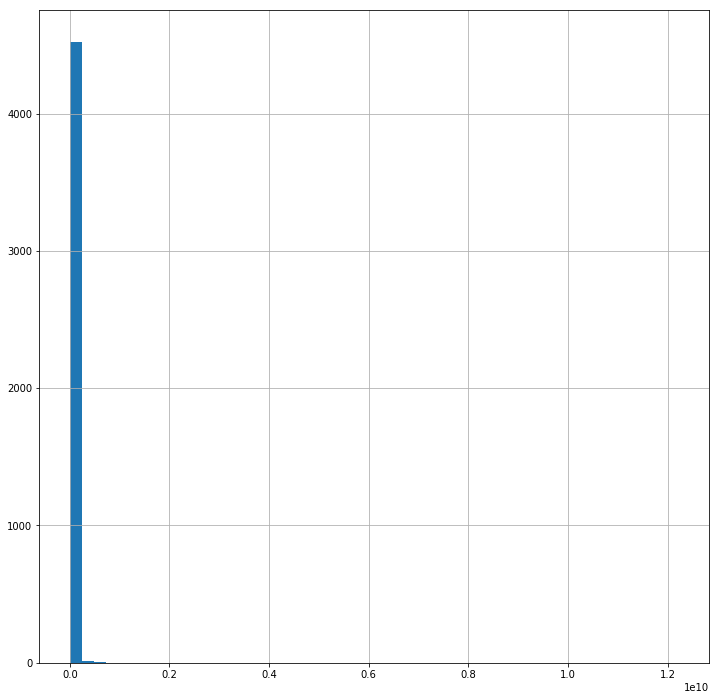

In [55]:
df["budget"].hist(figsize=(12,12), bins=50)
plt.show()

In [56]:
df["budget"] = df["budget"].fillna(df["budget"].mean())

### Aspect Ratio

In [57]:
print(df["aspect_ratio"].value_counts())

2.35     2360
1.85     1906
1.78      110
1.37      100
1.33       68
1.66       64
16.00      45
2.20       15
2.39       15
4.00        7
2.00        5
1.75        3
2.40        3
2.76        3
2.55        2
1.50        2
2.24        1
1.20        1
1.18        1
1.44        1
1.77        1
1.89        1
Name: aspect_ratio, dtype: int64


In [58]:
# df["content_rating"] = df["content_rating"].fillna("Other")

In [59]:
### Actor Encoding

In [60]:
for column in df:
    if column.endswith("_name"):
        df[column] = df[column].fillna("None")
    if column.endswith("likes"):
        df[column] = df[column].fillna(0)

In [61]:
df["num_critic_for_reviews"].astype(int)
df["duration"].astype(int)
for column in df:
    if column.endswith("_likes"):
        df[column].astype(int)

In [62]:
df.dropna(subset=['director_name'], how='all', inplace = True)
df.dropna(subset=['actor_3_facebook_likes'], how='all', inplace = True)

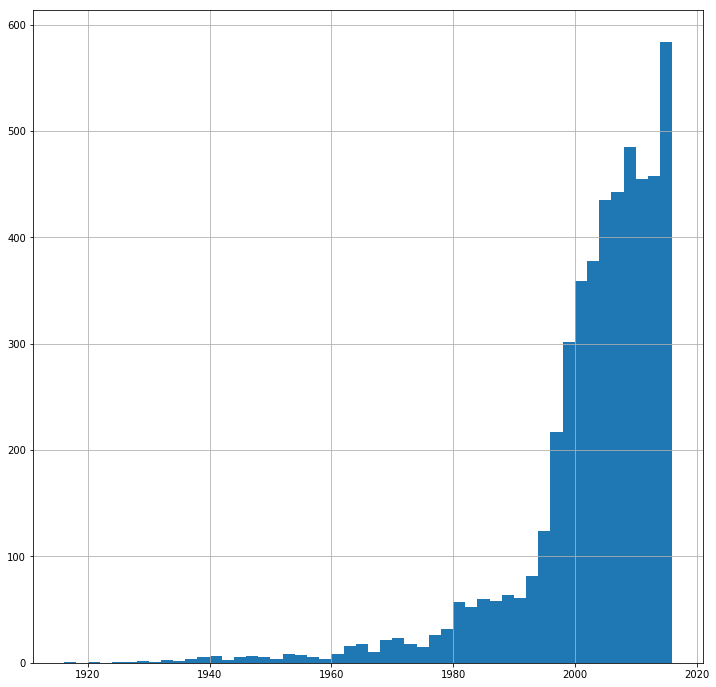

In [63]:
df["title_year"].hist(figsize=(12,12), bins=50)
plt.show()

In [64]:
df["title_year"] = df["title_year"].fillna(df["title_year"].mean())

### Actor's name

In [65]:
# from collections import *

# class OrderedCounter(Counter, OrderedDict):
#     pass

# counterlist = OrderedCounter({'would': 203, 'they': 138, 'your': 134})

# print counterlist.keys()

In [66]:
name_list = ["actor_1_name", "actor_2_name", "actor_3_name"]

cnt_actor = Counter()
for liste in name_list:
    for name in df[liste].tolist():
        cnt_actor[name] += 1
        
#print(cnt_actor)
# print(list(cnt_actor.keys())[:10])
# print(list(cnt_actor.values())[:10])

print(cnt_actor['Robert De Niro'])

54


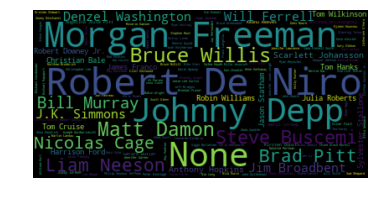

In [67]:
wordcloud = WordCloud()
wordcloud.generate_from_frequencies(frequencies=cnt_actor)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig("img/actor_cloud.png")
plt.show()

In [68]:
# for liste in name_list:
#     df[liste] = df[liste].apply(lambda x : cnt_actor[x])

### Duplicated

In [69]:
df[df.duplicated(subset=["movie_title"], keep=False)]["movie_title"]

6                                    Spider-Man 3 
17                                   The Avengers 
25                                      King Kong 
30                                        Skyfall 
33                            Alice in Wonderland 
38                      Oz the Great and Powerful 
40                                   TRON: Legacy 
50                               The Great Gatsby 
63                           The Legend of Tarzan 
79                                The Jungle Book 
84                                     The Lovers 
98                            Godzilla Resurgence 
100                      The Fast and the Furious 
137                          The Legend of Tarzan 
145                                           Pan 
150                                  Ghostbusters 
159                        Exodus: Gods and Kings 
174     The Twilight Saga: Breaking Dawn - Part 2 
187     The Twilight Saga: Breaking Dawn - Part 2 
188                            

In [70]:
#df[df["movie_title"] == "The Twilight Saga: Breaking Dawn - Part 2" ]  #  df["movie_title"] == "Matrix" 
df.iloc[[4949, 4950]]
df.iloc[[174, 187]]

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,type_Sport,type_Musical,type_Documentary,type_Western,All_age,Min_7,Min_13,All_PG,Min_16,Min_17
174,Color,Bill Condon,322.0,115.0,386.0,12000.0,Kristen Stewart,21000.0,292298923.0,Adventure|Drama|Fantasy|Romance,...,0,0,0,0,0,0,0,1,1,1
187,Color,Bill Condon,322.0,115.0,386.0,12000.0,Kristen Stewart,21000.0,292298923.0,Adventure|Drama|Fantasy|Romance,...,0,0,0,0,0,0,0,1,1,1


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5043 entries, 0 to 5042
Data columns (total 54 columns):
color                        5043 non-null object
director_name                5043 non-null object
num_critic_for_reviews       5043 non-null float64
duration                     5043 non-null float64
director_facebook_likes      5043 non-null float64
actor_3_facebook_likes       5043 non-null float64
actor_2_name                 5043 non-null object
actor_1_facebook_likes       5043 non-null float64
gross                        5043 non-null float64
genres                       5043 non-null object
actor_1_name                 5043 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5043 non-null object
facenumber_in_poster         5043 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

### Fields to remove

In [72]:
df = df.drop(["aspect_ratio"], axis=1)  # données manquantes

In [73]:
df = df.drop(["plot_keywords"], axis=1) # données manquantes

In [74]:
df = df.drop(["movie_imdb_link"], axis=1)  # inutile

In [75]:
df = df.drop_duplicates(subset=["movie_title"], keep='first')

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4917 entries, 0 to 5042
Data columns (total 51 columns):
color                        4917 non-null object
director_name                4917 non-null object
num_critic_for_reviews       4917 non-null float64
duration                     4917 non-null float64
director_facebook_likes      4917 non-null float64
actor_3_facebook_likes       4917 non-null float64
actor_2_name                 4917 non-null object
actor_1_facebook_likes       4917 non-null float64
gross                        4917 non-null float64
genres                       4917 non-null object
actor_1_name                 4917 non-null object
movie_title                  4917 non-null object
num_voted_users              4917 non-null int64
cast_total_facebook_likes    4917 non-null int64
actor_3_name                 4917 non-null object
facenumber_in_poster         4917 non-null float64
num_user_for_reviews         4917 non-null float64
language                     4917 non

# Analyse multivarié

In [77]:
act = []
for col in list(df)[:24]:
    if df[col].dtype == "object":
        pass
    else:
        act.append(col)
print(act)

['num_critic_for_reviews', 'duration', 'director_facebook_likes', 'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross', 'num_voted_users', 'cast_total_facebook_likes', 'facenumber_in_poster', 'num_user_for_reviews', 'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score', 'movie_facebook_likes']


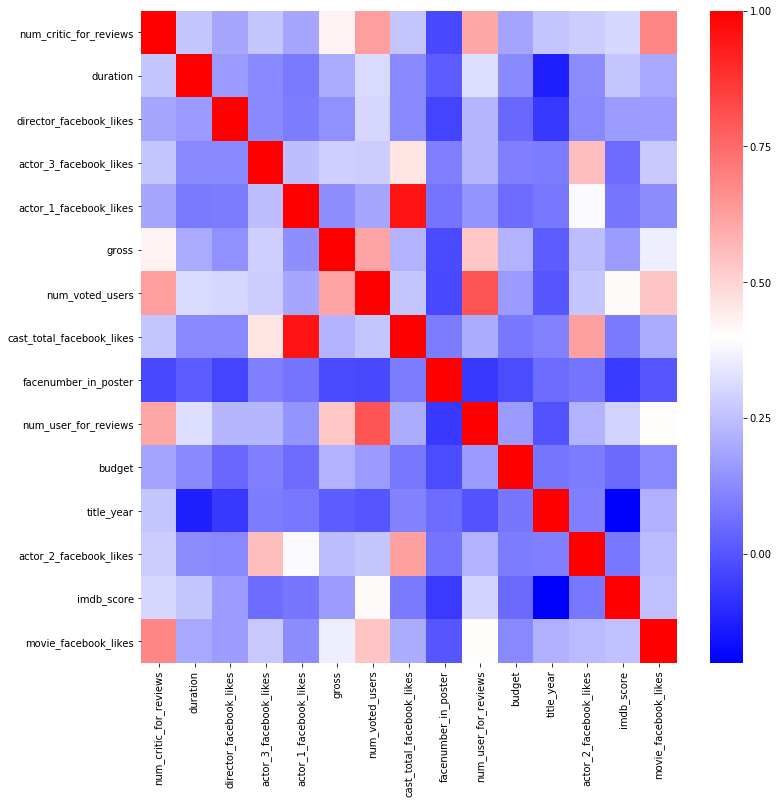

In [78]:
plt.figure(figsize=(12,12))
correlation_matrix = df[act].corr()
sns.heatmap(correlation_matrix, cmap="bwr")
plt.show()

In [79]:
#df = df[list(df)[:24]]

In [80]:
# for col in df:
#     if col.startswith("key"):
#         print(col)

In [81]:
backup_df = df.copy()

# Encodage/Scaling

In [82]:
df_clear = df.copy()
df_encoded = df.copy()

In [83]:
d = defaultdict(preprocessing.LabelEncoder)

for col in df:
    if df[col].dtype == "object":
        df[col] = d[col].fit_transform(df[col])

In [84]:
df_clear.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4917 entries, 0 to 5042
Data columns (total 51 columns):
color                        4917 non-null object
director_name                4917 non-null object
num_critic_for_reviews       4917 non-null float64
duration                     4917 non-null float64
director_facebook_likes      4917 non-null float64
actor_3_facebook_likes       4917 non-null float64
actor_2_name                 4917 non-null object
actor_1_facebook_likes       4917 non-null float64
gross                        4917 non-null float64
genres                       4917 non-null object
actor_1_name                 4917 non-null object
movie_title                  4917 non-null object
num_voted_users              4917 non-null int64
cast_total_facebook_likes    4917 non-null int64
actor_3_name                 4917 non-null object
facenumber_in_poster         4917 non-null float64
num_user_for_reviews         4917 non-null float64
language                     4917 non

In [85]:
to_delete_clean = [
    "color", "director_facebook_likes", 
    "actor_3_facebook_likes", "actor_2_facebook_likes", "actor_1_facebook_likes", 
    "gross", "facenumber_in_poster", 
    "num_user_for_reviews", "num_critic_for_reviews", 
    "budget"
]

df_clear.drop(to_delete_clean, axis=1, inplace=True)

for col in df:
    if col.startswith("type_"):
        df_clear.drop([col], axis=1, inplace=True)

In [86]:
df_clear.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4917 entries, 0 to 5042
Data columns (total 20 columns):
director_name                4917 non-null object
duration                     4917 non-null float64
actor_2_name                 4917 non-null object
genres                       4917 non-null object
actor_1_name                 4917 non-null object
movie_title                  4917 non-null object
num_voted_users              4917 non-null int64
cast_total_facebook_likes    4917 non-null int64
actor_3_name                 4917 non-null object
language                     4917 non-null object
country                      4917 non-null object
title_year                   4917 non-null float64
imdb_score                   4917 non-null float64
movie_facebook_likes         4917 non-null int64
All_age                      4917 non-null int64
Min_7                        4917 non-null int64
Min_13                       4917 non-null int64
All_PG                       4917 non-null int

In [87]:
def encode_actor(x):
    if x == "None":
        return 0
    else:
        return cnt_actor[x]

In [88]:
to_delete_encoded = [
    "movie_title", "genres"
]

df_encoded.drop(to_delete_encoded, axis=1, inplace=True)

for liste in name_list:
    df_encoded[liste] = df_encoded[liste].apply(lambda x : encode_actor(x))

In [89]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4917 entries, 0 to 5042
Data columns (total 49 columns):
color                        4917 non-null object
director_name                4917 non-null object
num_critic_for_reviews       4917 non-null float64
duration                     4917 non-null float64
director_facebook_likes      4917 non-null float64
actor_3_facebook_likes       4917 non-null float64
actor_2_name                 4917 non-null int64
actor_1_facebook_likes       4917 non-null float64
gross                        4917 non-null float64
actor_1_name                 4917 non-null int64
num_voted_users              4917 non-null int64
cast_total_facebook_likes    4917 non-null int64
actor_3_name                 4917 non-null int64
facenumber_in_poster         4917 non-null float64
num_user_for_reviews         4917 non-null float64
language                     4917 non-null object
country                      4917 non-null object
budget                       4917 non-nu

In [90]:
d = defaultdict(preprocessing.LabelEncoder)

for col in df_encoded:
    if df_encoded[col].dtype == "object":
        df_encoded[col] = d[col].fit_transform(df_encoded[col])

In [91]:
scaler = MinMaxScaler()
# scaled_features = MinMaxScaler().fit_transform(df.values)
all_col = [col for col in df_encoded]
df_encoded[all_col] = scaler.fit_transform(df_encoded[all_col])

In [ ]:
#df_prev_enc = backup_df.copy()

In [ ]:
#df_prev_enc["movie_title"]

In [ ]:
#df = backup_df.copy()

In [ ]:
#df = df.drop(["movie_title"], axis=1)

In [ ]:
#df_prev_enc["movie_title"]

In [ ]:
#print(d)

In [ ]:
# for key, val in d.items():
#     print(key, val)

In [ ]:
#print(df)

In [ ]:
#print(df.info())

In [ ]:
# for col in df:
#     if df[col].dtype == "object":
#         df[col] = d[col].transform(df[col])
#df = df.apply(lambda x: d[x.name].transform(x))

## No modele - Dist only

In [92]:
df = df_clear.copy()
dfe = df_encoded.copy()

In [93]:
X = df_encoded.as_matrix()

In [95]:
selected_movie = 2 # 1, 2, 6, 32, 222, 1250, 2500

a = X[selected_movie]
b = X - a
dist = np.sqrt(np.sum(np.square(b), axis=1))
n_closest = np.argsort(dist)[0:6]
print(n_closest)
print(dist[n_closest])

check_features = ["movie_title", "director_name", "title_year", "actor_1_name", "actor_2_name", "actor_3_name", "imdb_score"]

#print(df_prev_enc.iloc[selected_movie][check_features])
print(df.iloc[n_closest][check_features])

[  2  30 213 579 171 249]
[ 0.          0.33395369  0.41359174  0.62351673  0.66227027  0.67321492]
                  movie_title       director_name  title_year  \
2                    Spectre           Sam Mendes      2015.0   
30                   Skyfall           Sam Mendes      2012.0   
216        The Bourne Legacy          Tony Gilroy      2012.0   
585                      xXx            Rob Cohen      2002.0   
172  The World Is Not Enough        Michael Apted      1999.0   
252      Tomorrow Never Dies   Roger Spottiswoode      1997.0   

           actor_1_name            actor_2_name      actor_3_name  imdb_score  
2       Christoph Waltz            Rory Kinnear  Stephanie Sigman         6.8  
30        Albert Finney           Helen McCrory      Rory Kinnear         7.8  
216       Jeremy Renner             Scott Glenn       Stacy Keach         6.7  
585          Vin Diesel                     Eve     Leila Arcieri         5.8  
172        Colin Salmon  Maria Grazia Cucino

## DBscan

In [92]:
df = df_clear.copy()
dfe = df_encoded.copy()

In [93]:
scan = DBSCAN()
pos = scan.fit_predict(dfe)

In [94]:
print(pos)
print(min(pos), max(pos))

[-1 15 -1 ..., 87 18  0]
-1 121


In [95]:
df["cluster"] = pos

In [96]:
print(df[df["cluster"] == 6]["movie_title"])

94      Terminator 3: Rise of the Machines 
126                    The Matrix Reloaded 
167                                   Hulk 
214                           Total Recall 
288             Terminator 2: Judgment Day 
428                                  Dredd 
601                     Battle Los Angeles 
882                               Æon Flux 
1309         Universal Soldier: The Return 
2200                        The Black Hole 
2453                             Megaforce 
3575                        The Terminator 
3598                  Escape from New York 
4185    Escape from the Planet of the Apes 
4362     Battle for the Planet of the Apes 
4380    Conquest of the Planet of the Apes 
Name: movie_title, dtype: object


In [117]:
scan.components_[0,:]

array([  1.00000000e+00,   2.50312891e-01,   0.00000000e+00,
         1.98811655e-01,   5.69565217e-03,   0.00000000e+00,
         1.85185185e-02,   2.04687500e-04,   6.37316019e-02,
         1.85185185e-02,   1.77540111e-06,   2.17745497e-04,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         2.39130435e-01,   9.68750000e-01,   9.46485821e-03,
         8.64705167e-01,   8.75912409e-05,   6.96202532e-01,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00]

In [118]:
scan.core_sample_indices_ 

array([   4,    9,   28, ..., 4914, 4915, 4916], dtype=int64)

## Clustering hierarchique

In [103]:
df = df_clear.copy()
dfe = df_encoded.copy()

In [104]:
from sklearn.cluster import AgglomerativeClustering

In [105]:
agg_cl = AgglomerativeClustering(n_clusters=10)
pos = agg_cl.fit_predict(dfe)

In [106]:
print(pos)

[9 9 8 ..., 5 1 0]


In [107]:
df["cluster"] = pos

In [108]:
print(df[df["cluster"] == 9]["movie_title"])

0                                                 Avatar 
1               Pirates of the Caribbean: At World's End 
5                                            John Carter 
6                                           Spider-Man 3 
8                                Avengers: Age of Ultron 
10                    Batman v Superman: Dawn of Justice 
11                                      Superman Returns 
12                                     Quantum of Solace 
13            Pirates of the Caribbean: Dead Man's Chest 
14                                       The Lone Ranger 
15                                          Man of Steel 
17                                          The Avengers 
18           Pirates of the Caribbean: On Stranger Tides 
21                                The Amazing Spider-Man 
22                                            Robin Hood 
25                                             King Kong 
27                            Captain America: Civil War 
28            

In [162]:
import itertools
X = dfe.as_matrix()
ii = itertools.count(X.shape[0])
graphe = [{'node_id': next(ii), 'left': x[0], 'right':x[1]} for x in agg_cl.children_]

In [163]:
id_liste = []
loop= 0 
threshold = len(dfe)
look_for = 6
for i in range(4):
    for node in graphe:
        if node["left"] == look_for:
            look_for = node["node_id"]
            id_liste += [node["right"]]
            loop += 1
            break
        if node["right"] == look_for:
            look_for = node["node_id"]
            id_liste += [node["left"]]
            loop += 1
            break
print(id_liste)

[8433, 8308, 8901, 9582]


In [199]:
def get_child(id_node):
    for node in graphe:
        if node["node_id"] == id_node:
            return node["left"], node["right"]

def get_parent(id_movie):
    for node in graphe:
        if node["left"] == id_movie or node["right"] == id_movie:
            return node["node_id"]

print(get_parent(6))
print(get_child(8644))
print(get_child(8433))
print(get_child(7050))

print(get_parent(8644))
print(get_child(9319))
print(get_child(8308))
print(get_child(5265))   

closest = [1169, 395, 1266, 51, 31, 160]

df.iloc[closest]

8644
(6, 8433)
(1169, 7050)
(395, 1266)
9319
(8308, 8644)
(51, 5265)
(31, 160)


,director_name,duration,actor_2_name,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,language,...,title_year,imdb_score,movie_facebook_likes,All_age,Min_7,Min_13,All_PG,Min_16,Min_17,cluster
1179,Brian Helgeland,144.0,Rufus Sewell,Action|Adventure|Romance,Heath Ledger,A Knight's Tale,137003,18761,Bérénice Bejo,English,...,2001.0,6.9,0,0,0,0,1,1,1,9
401,Paul W.S. Anderson,110.0,Logan Lerman,Action|Adventure|Romance,Milla Jovovich,The Three Musketeers,88542,27694,Orlando Bloom,English,...,2011.0,5.8,19000,0,0,0,1,1,1,9
1277,Peter Hyams,104.0,Justin Chambers,Action|Adventure|Romance,Catherine Deneuve,The Musketeer,12856,2888,Stephen Rea,English,...,2001.0,4.7,299,0,0,0,1,1,1,9
51,Mike Newell,116.0,Richard Coyle,Action|Adventure|Fantasy|Romance,Jake Gyllenhaal,Prince of Persia: The Sands of Time,222403,16149,Reece Ritchie,English,...,2010.0,6.6,23000,0,0,0,1,1,1,9
31,Sam Raimi,135.0,James Franco,Action|Adventure|Fantasy|Romance,J.K. Simmons,Spider-Man 2,411164,43388,Kirsten Dunst,English,...,2004.0,7.3,0,0,0,0,1,1,1,9
161,Sam Raimi,121.0,James Franco,Action|Adventure|Fantasy|Romance,J.K. Simmons,Spider-Man,544665,40484,Kirsten Dunst,English,...,2002.0,7.3,5000,0,0,0,1,1,1,9


In [197]:
threshold = len(dfe)
to_explore = [6]
movies = []
explored = []

while len(movies) < 5 and len(to_explore) > 0:
    current = to_explore.pop()
    print(current)
    parent = get_parent(current)
    print(parent)
    a, b = get_child(parent)
    print(a, b)
    explored.append(parent)
    if a == current:
        if b < threshold:
            movies.append(b)
        else:
            if b not in explored:
                to_explore.append(b)
    else:
        if a < threshold:
            movies.append(a)
        else:
            if a not in explored:
                to_explore.append(a)  

# print(movies)


6
8644
6 8433
8433
8644
6 8433


In [189]:
df.iloc[movies]

,director_name,duration,actor_2_name,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,language,...,title_year,imdb_score,movie_facebook_likes,All_age,Min_7,Min_13,All_PG,Min_16,Min_17,cluster
6,Sam Raimi,156.0,James Franco,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383056,46055,Kirsten Dunst,English,...,2007.0,6.2,0,0,0,0,1,1,1,9
6,Sam Raimi,156.0,James Franco,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383056,46055,Kirsten Dunst,English,...,2007.0,6.2,0,0,0,0,1,1,1,9
6,Sam Raimi,156.0,James Franco,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383056,46055,Kirsten Dunst,English,...,2007.0,6.2,0,0,0,0,1,1,1,9
6,Sam Raimi,156.0,James Franco,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383056,46055,Kirsten Dunst,English,...,2007.0,6.2,0,0,0,0,1,1,1,9
6,Sam Raimi,156.0,James Franco,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383056,46055,Kirsten Dunst,English,...,2007.0,6.2,0,0,0,0,1,1,1,9


## Isomap

In [258]:
df = df_clear.copy()
dfe = df_encoded.copy()

In [259]:
from sklearn.manifold import Isomap

In [260]:
iso = Isomap(n_neighbors=10, n_components=4)
pos = iso.fit_transform(dfe)

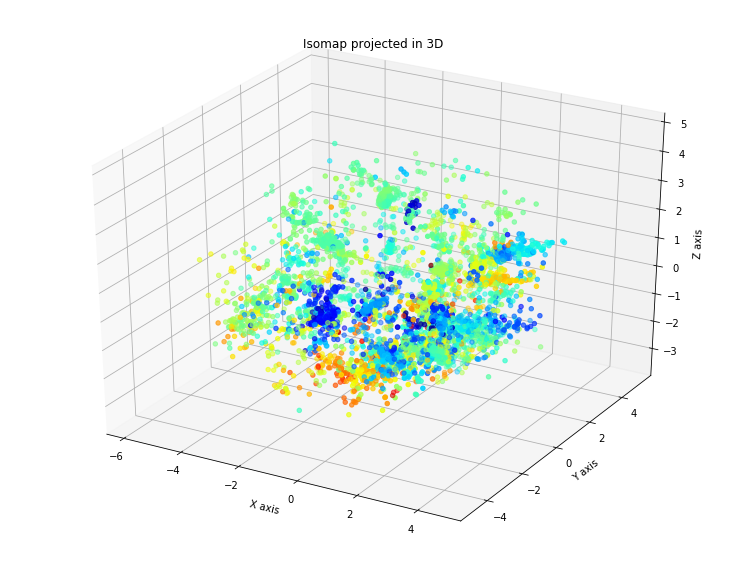

In [261]:
fig = plt.figure(figsize=(13,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pos[:, 0], pos[:, 1], pos[:, 2], c = pos[:, 3], cmap="jet")
ax.set_title("Isomap projected in 3D")
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.savefig("img/isomap3d.png")
plt.show()

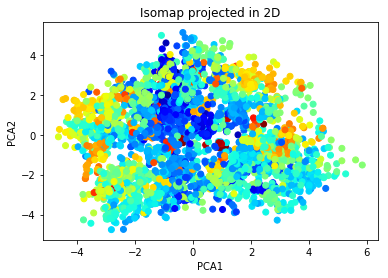

In [262]:
from sklearn.decomposition import PCA, IncrementalPCA
X_proj = PCA(n_components=3).fit_transform(pos)
    
plt.scatter(X_proj[:, 0], X_proj[:, 1], c=X_proj[:, 2], cmap="jet")

# fig = plt.figure(figsize=(13,10))
# #ax = fig.add_subplot(111, projection='3d')
# plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=df2['label'])
plt.title("Isomap projected in 2D")
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.savefig("img/isomap2d.png")
plt.show()

In [263]:
selected_movie = 6 # 1, 2, 6, 32, 222, 1250, 2500

a = pos[selected_movie]
print(a)

b = pos - a
dist = np.sqrt(np.sum(np.square(b), axis=1))
n_closest = np.argsort(dist)[0:6]
print(n_closest)
print(dist[n_closest])

check_features = ["movie_title", "director_name", "title_year", "actor_1_name", "actor_2_name", "actor_3_name", "imdb_score"]

#print(df_prev_enc.iloc[selected_movie][check_features])
print(df.iloc[n_closest][check_features])

[-0.42593563 -1.36797862 -0.3919314   3.26395359]
[   6  395 1169 1994 1266   51]
[ 0.          0.39057555  0.4893245   0.53230257  0.60035193  1.02257794]
                               movie_title       director_name  title_year  \
6                            Spider-Man 3            Sam Raimi      2007.0   
401                  The Three Musketeers   Paul W.S. Anderson      2011.0   
1179                      A Knight's Tale      Brian Helgeland      2001.0   
2012                             Ironclad     Jonathan English      2011.0   
1277                        The Musketeer          Peter Hyams      2001.0   
51    Prince of Persia: The Sands of Time          Mike Newell      2010.0   

           actor_1_name     actor_2_name   actor_3_name  imdb_score  
6          J.K. Simmons     James Franco  Kirsten Dunst         6.2  
401      Milla Jovovich     Logan Lerman  Orlando Bloom         5.8  
1179       Heath Ledger     Rufus Sewell  Bérénice Bejo         6.9  
2012      Jason F

# Spectral Embedding

In [253]:
df = df_clear.copy()
dfe = df_encoded.copy()

In [254]:
from sklearn.manifold import locally_linear_embedding
lle = locally_linear_embedding(dfe, n_neighbors=10, n_components=4)

In [255]:
print(lle[0].shape)
print(lle[1])
pos = lle[0]

(4917, 4)
-4.60464058426e-18


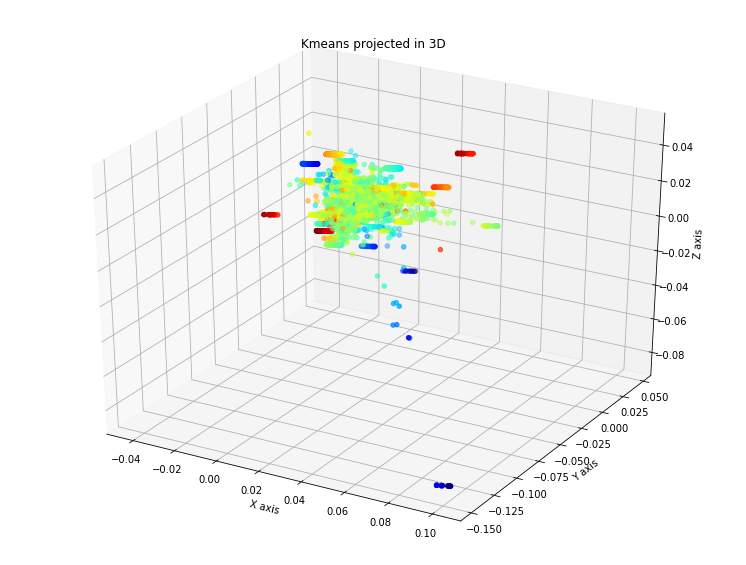

In [256]:
fig = plt.figure(figsize=(13,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pos[:, 0], pos[:, 1], pos[:, 2], c = pos[:, 3], cmap="jet")
ax.set_title("Kmeans projected in 3D")
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.savefig("img/lle3d.png")
plt.show()

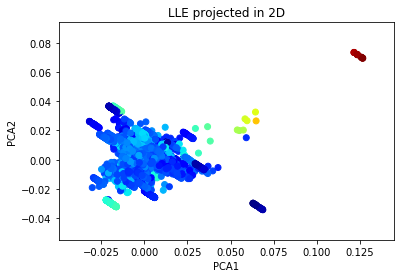

In [257]:
X_proj = PCA(n_components=3).fit_transform(pos)
    
plt.scatter(X_proj[:, 0], X_proj[:, 1], c=X_proj[:, 2], cmap="jet")
plt.title("LLE projected in 2D")
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.savefig("img/lle2d.png")
plt.show()

In [180]:
selected_movie = 6 # 1, 2, 6, 32, 222, 1250, 2500

a = pos[selected_movie]
print(a)

b = pos - a
dist = np.sqrt(np.sum(np.square(b), axis=1))
n_closest = np.argsort(dist)[0:6]
print(n_closest)
print(dist[n_closest])

check_features = ["movie_title", "director_name", "title_year", "actor_1_name", "actor_2_name", "actor_3_name", "imdb_score"]

#print(df_prev_enc.iloc[selected_movie][check_features])
print(df.iloc[n_closest][check_features])

[-0.0029501  -0.0076741   0.00377323]
[   6 1169  395 1920 3296 4709]
[ 0.          0.00053449  0.00101096  0.00134257  0.00160262  0.00167532]
                    movie_title       director_name  title_year  \
6                 Spider-Man 3            Sam Raimi      2007.0   
1179           A Knight's Tale      Brian Helgeland      2001.0   
401       The Three Musketeers   Paul W.S. Anderson      2011.0   
1937  The Shawshank Redemption       Frank Darabont      1994.0   
3355              Pulp Fiction    Quentin Tarantino      1994.0   
4824     It Happened One Night          Frank Capra      1934.0   

           actor_1_name    actor_2_name     actor_3_name  imdb_score  
6          J.K. Simmons    James Franco    Kirsten Dunst         6.2  
1179       Heath Ledger    Rufus Sewell    Bérénice Bejo         6.9  
401      Milla Jovovich    Logan Lerman    Orlando Bloom         5.8  
1937     Morgan Freeman  Jeffrey DeMunn       Bob Gunton         9.3  
3355       Bruce Willis     Eri

## KNN

In [ ]:
# from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# neigh = KNeighborsClassifier(n_neighbors=3)
# # neigh.fit(X, y) 
# neigh.kneighbors(df_encoded)

# Kmeans

In [247]:
df = df_clear.copy()
dfe = df_encoded.copy()

In [248]:
kmeans = KMeans(init="k-means++", n_clusters=15)
X_embedded = kmeans.fit_transform(df_encoded)

In [249]:
print(X_embedded)

[[ 2.62178261  1.62123964  2.78420616 ...,  2.99405786  2.81360119
   1.8799532 ]
 [ 2.12397038  1.58068236  2.30931425 ...,  2.55696247  2.34171301
   1.11036136]
 [ 2.13242296  1.42528487  2.32384884 ...,  2.56060146  2.35371157
   1.03627927]
 ..., 
 [ 1.54881308  2.20828979  2.27635381 ...,  2.05336597  1.8225566
   2.08559412]
 [ 1.520775    2.26645857  1.10230625 ...,  0.41599259  1.10340605
   2.10736542]
 [ 1.47650356  1.90790993  1.74833279 ...,  2.02391762  1.76499814
   1.78736083]]


In [250]:
df['label'] = kmeans.labels_
# print(df['label'])

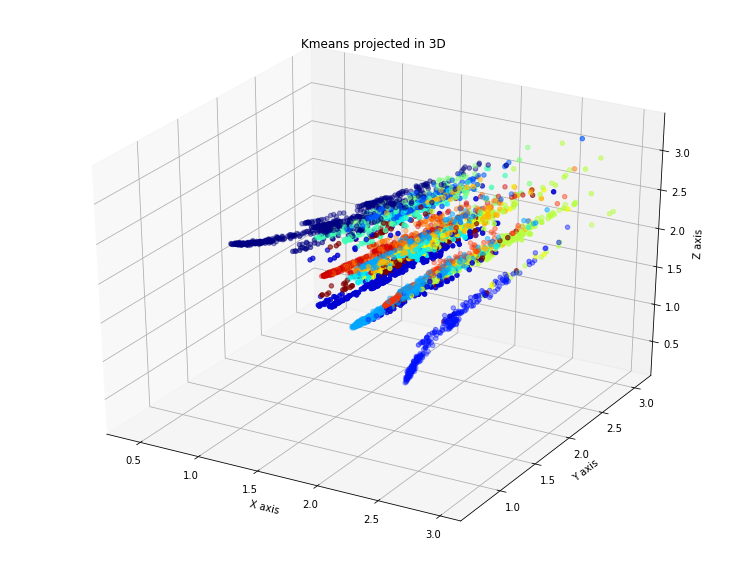

In [251]:
fig = plt.figure(figsize=(13,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_embedded[:, 0], X_embedded[:, 1], X_embedded[:, 2], c=df['label'], cmap="jet")
plt.title("Kmeans projected in 3D")
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.savefig("img/kmeans3d.png")
plt.show()

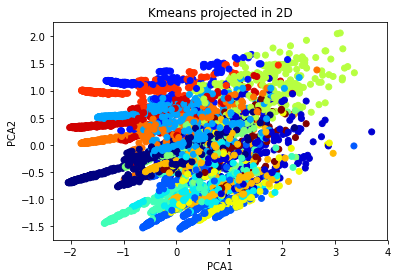

In [252]:
X_proj = PCA(n_components=3).fit_transform(X_embedded)
    
plt.scatter(X_proj[:, 0], X_proj[:, 1], c=df['label'], cmap="jet")
plt.title("Kmeans projected in 2D")
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.savefig("img/kmeans2d.png")
plt.show()

In [ ]:
# for col, encoder in d.items():
#     df[col]
#     df[col] = d[col].inverse_transform(df[col])

#df = df.apply(lambda x: d[x.name].inverse_transform(x))

In [150]:
print(df[df['label'] == 6]["movie_title"])

22                                            Robin Hood 
111                                         Pearl Harbor 
113                                            Alexander 
158                                     The Last Samurai 
173      Master and Commander: The Far Side of the World 
243                                          Windtalkers 
253                                          The Patriot 
261                               300: Rise of an Empire 
275                                    Kingdom of Heaven 
320                              In the Heart of the Sea 
327                                   The Flowers of War 
330                                      Black Hawk Down 
348                                            The Alamo 
367                                              Ben-Hur 
370                                             Valkyrie 
388                                 K-19: The Widowmaker 
393                                           Seabiscuit 
414           

In [152]:
selected_movie = 6 # 1, 2, 6, 32, 222, 1250, 2500

a = X_embedded[selected_movie]
print(a)

b = X_embedded - a
dist = np.sqrt(np.sum(np.square(b), axis=1))
n_closest = np.argsort(dist)[0:6]
print(n_closest)
print(dist[n_closest])

check_features = ["movie_title", "director_name", "title_year", "actor_1_name", "actor_2_name", "actor_3_name", "imdb_score"]

#print(df_prev_enc.iloc[selected_movie][check_features])
print(df.iloc[n_closest][check_features])

[ 1.71756137  2.21051525  2.20463434  2.25501944  2.18990808  2.29427095
  2.27314905  2.47981041  2.35317149  2.353275    1.5454914   1.88332385
  1.97068106  1.97049636  2.44566198]
[   6 1994   51 3152  395 1266]
[ 0.          0.35587114  0.46096208  0.49927322  0.51743105  0.56869491]
                               movie_title       director_name  title_year  \
6                            Spider-Man 3            Sam Raimi      2007.0   
2012                             Ironclad     Jonathan English      2011.0   
51    Prince of Persia: The Sands of Time          Mike Newell      2010.0   
3208                               Krrish        Rakesh Roshan      2006.0   
401                  The Three Musketeers   Paul W.S. Anderson      2011.0   
1277                        The Musketeer          Peter Hyams      2001.0   

           actor_1_name     actor_2_name   actor_3_name  imdb_score  
6          J.K. Simmons     James Franco  Kirsten Dunst         6.2  
2012      Jason Flemyng

In [ ]:
# ind_c2 = df.index[df['label'] == 1].tolist()
# df_prev_enc.iloc[ind_c2]["movie_title"]

In [ ]:
# df.iloc[ind_c2]["movie_title"]

In [ ]:
# df.iloc[ind_c2]["movie_title"]

In [ ]:
# for i in range(3, 15, 2):
#     kmeans = KMeans(n_clusters=i, init="k-means++")
#     X_embedded = kmeans.fit_transform(df2)
#     fig = plt.figure(figsize=(13,10))
#     ax = fig.add_subplot(111, projection='3d')
#     ax.scatter(X_embedded[:, 0], X_embedded[:, 1], X_embedded[:, 2], c=df2['label'])
#     plt.title(i)
#     plt.show()

# TSNE

In [ ]:
# df_prev_enc = backup_df.copy()
# df = backup_df.copy()

In [98]:
# df = df.drop(["movie_title"], axis=1)

# d = defaultdict(preprocessing.LabelEncoder)

# for col in df:
#     if df[col].dtype == "object":
#         df[col] = d[col].fit_transform(df[col])
        
# scaler = MinMaxScaler()
# all_col = [col for col in df]
# df[all_col] = scaler.fit_transform(df[all_col])

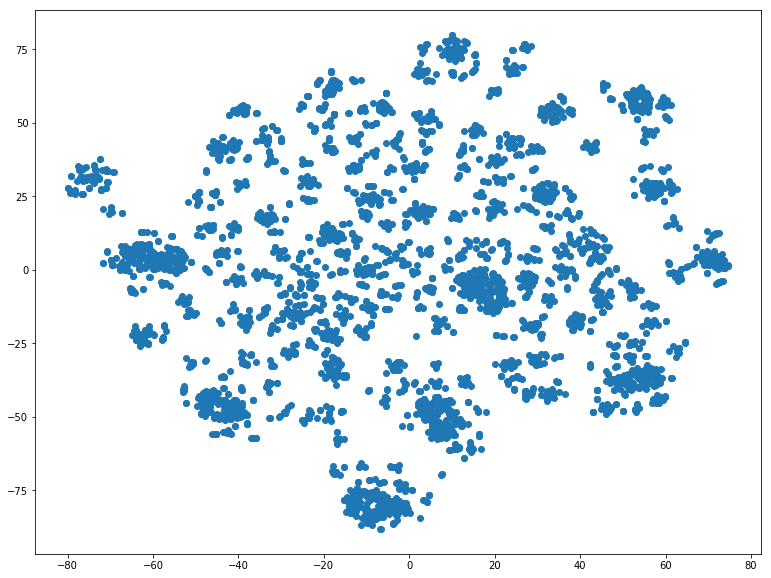

[[-16.92456055   6.1901598 ]
 [ -8.86919975  -0.16186619]
 [  4.65180588  18.91115952]
 ..., 
 [ 12.5382328   40.40686798]
 [-11.2196722  -76.18991852]
 [-75.26493835  30.82471848]]
0.8123406767845154
[  4.65180588  18.91115952]
[  2  30 213 579 853 657]
[ 0.          0.1710142   0.39034629  1.41354752  1.42485237  1.48934984]
             movie_title director_name  title_year        actor_1_name  \
2               Spectre     Sam Mendes      2015.0     Christoph Waltz   
30              Skyfall     Sam Mendes      2012.0       Albert Finney   
216   The Bourne Legacy    Tony Gilroy      2012.0       Jeremy Renner   
585                 xXx      Rob Cohen      2002.0          Vin Diesel   
862  Executive Decision   Stuart Baird      1996.0        Oliver Platt   
665         Cliffhanger   Renny Harlin      1993.0  Sylvester Stallone   

      actor_2_name      actor_3_name  imdb_score  
2     Rory Kinnear  Stephanie Sigman         6.8  
30   Helen McCrory      Rory Kinnear         7.8  

In [99]:
df = df_clear.copy()
dfe = df_encoded.copy()

tsne = TSNE(n_components=2)
X_embedded = tsne.fit_transform(dfe)

plt.figure(figsize=(13,10))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1])
plt.show()

print(X_embedded)

print(tsne.kl_divergence_ )

selected_movie = 2 # 1, 2, 6, 32, 222, 1250, 2500

a = X_embedded[selected_movie]
print(a)

b = X_embedded - a
dist = np.sqrt(np.sum(np.square(b), axis=1))
n_closest = np.argsort(dist)[0:6]
print(n_closest)
print(dist[n_closest])

check_features = ["movie_title", "director_name", "title_year", "actor_1_name", "actor_2_name", "actor_3_name", "imdb_score"]

#print(df_prev_enc.iloc[selected_movie][check_features])
print(df.iloc[n_closest][check_features])

In [100]:
tsne = TSNE(n_components=2)
X_embedded = tsne.fit_transform(dfe)

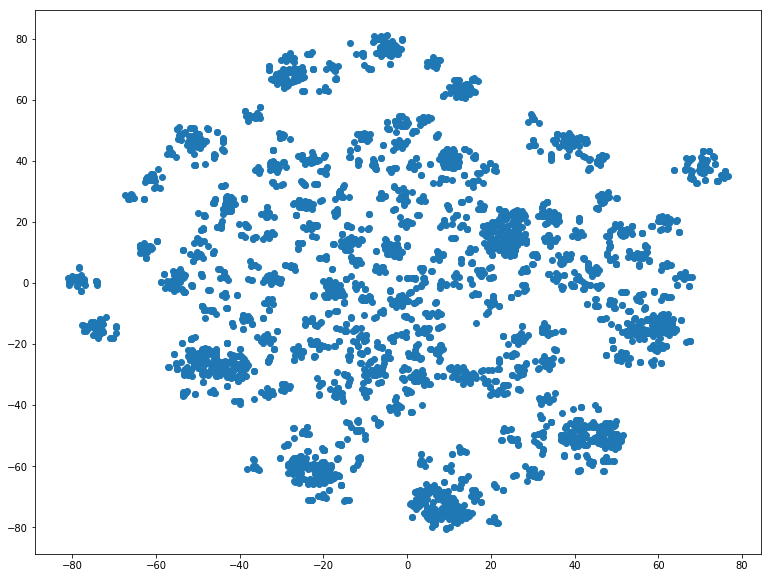

In [101]:
plt.figure(figsize=(13,10))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1])
plt.show()

In [102]:
print(X_embedded)

[[-11.0364151   -5.40561676]
 [ -0.58511001  -5.07276392]
 [ -1.34309113  10.16513634]
 ..., 
 [ -8.17478371  38.58866882]
 [  6.36500502 -68.21950531]
 [ 70.92507935  38.61557388]]


In [103]:
print(tsne.kl_divergence_ )

0.8096877932548523


In [104]:
selected_movie = 2 # 1, 2, 6, 32, 222, 1250, 2500

a = X_embedded[selected_movie]
print(a)

[ -1.34309113  10.16513634]


In [105]:
b = X_embedded - a
dist = np.sqrt(np.sum(np.square(b), axis=1))
n_closest = np.argsort(dist)[0:6]
print(n_closest)
print(dist[n_closest])

check_features = ["movie_title", "director_name", "title_year", "actor_1_name", "actor_2_name", "actor_3_name", "imdb_score"]

#print(df_prev_enc.iloc[selected_movie][check_features])
print(df.iloc[n_closest][check_features])

[  2  30 213 853 579 979]
[ 0.          0.17891516  0.40511388  1.36075389  1.4271698   1.52037489]
             movie_title  director_name  title_year     actor_1_name  \
2               Spectre      Sam Mendes      2015.0  Christoph Waltz   
30              Skyfall      Sam Mendes      2012.0    Albert Finney   
216   The Bourne Legacy     Tony Gilroy      2012.0    Jeremy Renner   
862  Executive Decision    Stuart Baird      1996.0     Oliver Platt   
585                 xXx       Rob Cohen      2002.0       Vin Diesel   
988    On Deadly Ground   Steven Seagal      1994.0       Mike Starr   

      actor_2_name      actor_3_name  imdb_score  
2     Rory Kinnear  Stephanie Sigman         6.8  
30   Helen McCrory      Rory Kinnear         7.8  
216    Scott Glenn       Stacy Keach         6.7  
862     Joe Morton        J.T. Walsh         6.4  
585            Eve     Leila Arcieri         5.8  
988      Joan Chen  Sven-Ole Thorsen         4.4  


In [109]:
# ind_c2 = df.index[df['label'] == 1].tolist()
# df_prev_enc.iloc[ind_c2]["movie_title"]

# PCA

In [110]:
# df_prev_enc = backup_df.copy()
# df = backup_df.copy()

In [111]:
# df = df.drop(["movie_title"], axis=1)

# d = defaultdict(preprocessing.LabelEncoder)

# for col in df:
#     if df[col].dtype == "object":
#         df[col] = d[col].fit_transform(df[col])
        
# scaler = MinMaxScaler()
# all_col = [col for col in df]
# df[all_col] = scaler.fit_transform(df[all_col])

In [245]:
df = df_clear.copy()
dfe = df_encoded.copy()

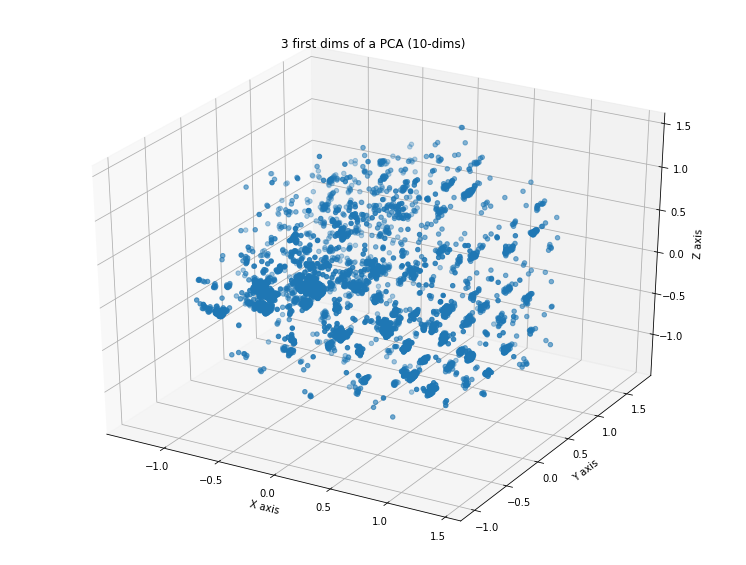

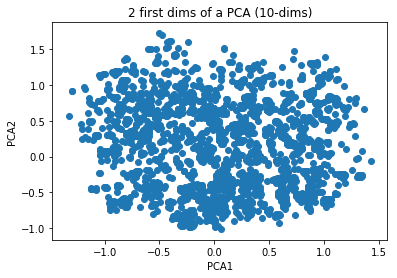

[ 0.15399941  0.14495007  0.08335209  0.06937358  0.05900856  0.0510279
  0.04094256  0.03419095  0.03226559  0.03074508]
[ 0.15399941  0.29894948  0.38230157  0.45167515  0.51068371  0.56171161
  0.60265417  0.63684512  0.66911071  0.69985579]


In [246]:
n_comp = 10
pca = PCA(n_components=n_comp)
X_proj = pca.fit_transform(df_encoded)

fig = plt.figure(figsize=(13,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_proj[:, 0], X_proj[:, 1], X_proj[:, 2])
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title("3 first dims of a PCA ({}-dims)".format(n_comp))
plt.savefig("img/PCA3d.png")
plt.show()

plt.scatter(X_proj[:, 0], X_proj[:, 1])

plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.title("2 first dims of a PCA ({}-dims)".format(n_comp))
#plt.savefig("{}-points".format(sample_size), dpi=600)
plt.savefig("img/PCA2d.png")
plt.show()

print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.cumsum())

In [183]:
selected_movie = 6 # 1, 2, 6, 32, 222, 1250, 2500

a = X_proj[selected_movie]
print(a)

b = X_proj - a
dist = np.sqrt(np.sum(np.square(b), axis=1))
n_closest = np.argsort(dist)[0:6]
print(n_closest)
print(dist[n_closest])

check_features = ["movie_title", "director_name", "title_year", "actor_1_name", "actor_2_name", "actor_3_name", "imdb_score"]

#print(df_prev_enc.iloc[selected_movie][check_features])
print(df.iloc[n_closest][check_features])

[ 0.04828913  0.65190799  0.6766271   0.68626015  0.87056793  0.08483885
 -0.47742114 -0.08519861 -0.127482   -0.45771604]
[   6  395 1266 4408 1994 3999]
[ 0.          0.17946524  0.24079002  0.37805242  0.40967933  0.50283415]
                           movie_title       director_name  title_year  \
6                        Spider-Man 3            Sam Raimi      2007.0   
401              The Three Musketeers   Paul W.S. Anderson      2011.0   
1277                    The Musketeer          Peter Hyams      2001.0   
4508  The Charge of the Light Brigade       Michael Curtiz      1936.0   
2012                         Ironclad     Jonathan English      2011.0   
4080                        Red River         Howard Hawks      1948.0   

           actor_1_name     actor_2_name     actor_3_name  imdb_score  
6          J.K. Simmons     James Franco    Kirsten Dunst         6.2  
401      Milla Jovovich     Logan Lerman    Orlando Bloom         5.8  
1277  Catherine Deneuve  Justin Cham

# Optimisation

In [234]:
df = df_clear.copy()
dfe = df_encoded.copy()

In [235]:
len(dfe)

4917

In [237]:
params = [
#     {"n_components":2, "n_iter":300, "n_iter_without_progress":100},
#     {"n_components":2, "n_iter":1000, "n_iter_without_progress":300},   # default
#     {"n_components":3, "n_iter":300, "n_iter_without_progress":100},
    {"n_components":3, "n_iter":500, "n_iter_without_progress":150}
]
for param in params:
    tsne = TSNE(**param)
    X_embedded = tsne.fit(dfe)
    print(param, tsne.kl_divergence_ )

{'n_components': 3, 'n_iter': 500, 'n_iter_without_progress': 150} 0.7598989009857178


In [239]:
X_embedded = TSNE(n_components=3).fit_transform(dfe)

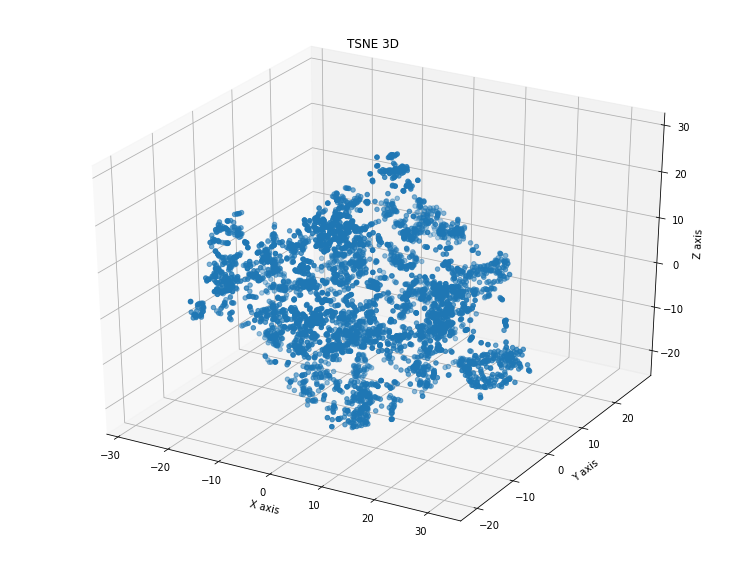

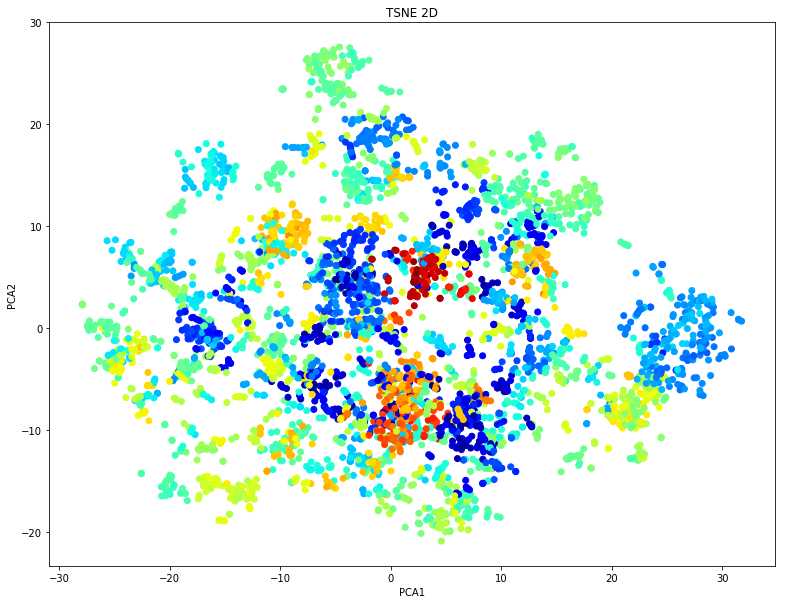

In [244]:
fig = plt.figure(figsize=(13,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_embedded[:, 0], X_embedded[:, 1], X_embedded[:, 2])
ax.set_title("TSNE 3D")
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.savefig("img/TSNE_3D.png")
plt.show()

plt.figure(figsize=(13,10))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=X_embedded[:, 2], cmap="jet")
plt.title("TSNE 2D")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.savefig("img/TSNE_2D.png")
plt.show()

In [ ]:
print(tsne.kl_divergence_ )

In [93]:
print(X_embedded)

[[ -6.59148788   1.76313698   2.45168543]
 [ -2.46161222  -0.68991083  -2.40858912]
 [  5.0051465    4.44881582   3.7366116 ]
 ..., 
 [ -4.45997953  -4.80284643  18.72378731]
 [  6.39354134   3.70803261 -22.48622894]
 [ -8.81031895 -26.40125847  -2.78159451]]


In [106]:
selected_movie = 6 # 1, 2, 6, 32, 222, 1250, 2500

a = X_embedded[selected_movie]
print(a)

[-0.91675413 -6.88008499 -2.31259227]


In [107]:
b = X_embedded - a
dist = np.sqrt(np.sum(np.square(b), axis=1))
n_closest = np.argsort(dist)[0:6]
print(n_closest)
print(dist[n_closest])

check_features = ["movie_title", "director_name", "title_year", "actor_1_name", "actor_2_name", "actor_3_name", "imdb_score"]

#print(df_prev_enc.iloc[selected_movie][check_features])
print(df.iloc[n_closest][check_features])

[   6  160   31  395 1266 1169]
[ 0.          1.1256181   1.15901613  1.29164779  1.39122248  1.40368474]
                movie_title       director_name  title_year  \
6             Spider-Man 3            Sam Raimi      2007.0   
161             Spider-Man            Sam Raimi      2002.0   
31            Spider-Man 2            Sam Raimi      2004.0   
401   The Three Musketeers   Paul W.S. Anderson      2011.0   
1277         The Musketeer          Peter Hyams      2001.0   
1179       A Knight's Tale      Brian Helgeland      2001.0   

           actor_1_name     actor_2_name   actor_3_name  imdb_score  
6          J.K. Simmons     James Franco  Kirsten Dunst         6.2  
161        J.K. Simmons     James Franco  Kirsten Dunst         7.3  
31         J.K. Simmons     James Franco  Kirsten Dunst         7.3  
401      Milla Jovovich     Logan Lerman  Orlando Bloom         5.8  
1277  Catherine Deneuve  Justin Chambers    Stephen Rea         4.7  
1179       Heath Ledger     Rufu

### creation dataset de prod avec les X/Y du TSNE

In [96]:
print(X_embedded.shape)
print(len(df))

(4917, 3)
4917


In [113]:
df = df.reset_index(drop=True)

In [114]:
if X_embedded.shape[1] == 2:
    col_name = ['X', 'Y']
else:
    col_name = ['X', 'Y', 'Z']

In [115]:
pos = pd.DataFrame(X_embedded, columns=col_name)

In [116]:
df_prod = pd.concat([df, pos], axis=1)

In [117]:
df_prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5036 entries, 0 to 5035
Data columns (total 23 columns):
director_name                4917 non-null object
duration                     4917 non-null float64
actor_2_name                 4917 non-null object
genres                       4917 non-null object
actor_1_name                 4917 non-null object
movie_title                  4917 non-null object
num_voted_users              4917 non-null float64
cast_total_facebook_likes    4917 non-null float64
actor_3_name                 4917 non-null object
language                     4917 non-null object
country                      4917 non-null object
title_year                   4917 non-null float64
imdb_score                   4917 non-null float64
movie_facebook_likes         4917 non-null float64
All_age                      4917 non-null float64
Min_7                        4917 non-null float64
Min_13                       4917 non-null float64
All_PG                       4917 

In [118]:
df_prod.to_csv("prod_dataset.csv", index=False, encoding="utf-8")

In [119]:
selected_movie = 6 # 1, 2, 6, 32, 222, 1250, 2500

X_embedded = df_prod[col_name].as_matrix()
a = X_embedded[selected_movie]
b = X_embedded - a
#dist = np.sqrt(np.sum(np.abs(b), axis=1))
dist = np.sqrt(np.sum(np.square(b), axis=1))
n_closest = np.argsort(dist)[0:6]

check_features = ["movie_title", "director_name", "title_year", "actor_1_name", "actor_2_name", "actor_3_name", "imdb_score"]

print(df_prod.iloc[n_closest][check_features])

                movie_title       director_name  title_year  \
6             Spider-Man 3            Sam Raimi      2007.0   
160             Spider-Man            Sam Raimi      2002.0   
31            Spider-Man 2            Sam Raimi      2004.0   
395   The Three Musketeers   Paul W.S. Anderson      2011.0   
1266         The Musketeer          Peter Hyams      2001.0   
1169       A Knight's Tale      Brian Helgeland      2001.0   

           actor_1_name     actor_2_name   actor_3_name  imdb_score  
6          J.K. Simmons     James Franco  Kirsten Dunst         6.2  
160        J.K. Simmons     James Franco  Kirsten Dunst         7.3  
31         J.K. Simmons     James Franco  Kirsten Dunst         7.3  
395      Milla Jovovich     Logan Lerman  Orlando Bloom         5.8  
1266  Catherine Deneuve  Justin Chambers    Stephen Rea         4.7  
1169       Heath Ledger     Rufus Sewell  Bérénice Bejo         6.9  


In [104]:
df[df.isnull().any(axis=1)]

,director_name,duration,actor_2_name,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,language,country,title_year,imdb_score,movie_facebook_likes,All_age,Min_7,Min_13,All_PG,Min_16,Min_17
